In [4]:
import pandas as pd
from plotnine import *
import numpy as np
import multiprocessing
from adjustText import adjust_text

# Figure 4: Archaelogical samples

## Fig 4A: Dog vs Human endogenous DNA source classification

In [10]:
endo_human = 1.247484
endo_dog = 0.106391

In [11]:
bp = "../../data/coproid_logratio/coproID_bp.csv"

In [12]:
d = pd.read_csv(bp, index_col=0)

In [13]:
d.head()

,Organism_name1,Organism_name2,Genome1_size,Genome2_size,nb_bp_aligned_genome1,nb_bp_aligned_genome2,nb_ancient_bp_aligned_genome1,nb_ancient_bp_aligned_genome2,normalized_nb_ancient_bp_aligned_genome1,normalized_nb_ancient_bp_aligned_genome2,NormalizedReadRatio_1,NormalizedReadRatio_2
Sample_name,,,,,,,,,,,,
AHP001_A0101_SG1_1_S0,Homo_sapiens,Canis_familiaris,3099922541,2327650711,65524,235200,568,24630,0.000002,0.001058,0.001732,0.998268
AHP001_B0101_SG1_1_S0,Homo_sapiens,Canis_familiaris,3099922541,2327650711,17673,585149,1606,67502,0.000005,0.002900,0.001784,0.998216
AHP002_A0101_SG1_1_S0,Homo_sapiens,Canis_familiaris,3099922541,2327650711,261762,109060,539,10938,0.000002,0.000470,0.003693,0.996307
AHP002_B0101_SG1_1_S0,Homo_sapiens,Canis_familiaris,3099922541,2327650711,25404,2290783,2558,259482,0.000008,0.011148,0.000740,0.999260
AHP003_A0101_SG1_1_S0,Homo_sapiens,Canis_familiaris,3099922541,2327650711,311418,141992,835,17368,0.000003,0.000746,0.003601,0.996399


In [14]:
d2 = pd.DataFrame()

In [15]:
d2['nnb_bp_aligned_genome1'] = (d['nb_bp_aligned_genome1']/d['Genome1_size'][0])/endo_human
d2['nnb_ancient_bp_aligned_genome1'] = (d['nb_ancient_bp_aligned_genome1']/d['Genome1_size'][0])/endo_human
d2['nnb_bp_aligned_genome2'] = (d['nb_bp_aligned_genome2']/d['Genome2_size'][0])/endo_dog
d2['nnb_ancient_bp_aligned_genome2'] = (d['nb_ancient_bp_aligned_genome2']/d['Genome2_size'][0])/endo_dog

In [16]:
new_index = []
for i in list(d2.index.str.split("_")):
    if len(i) > 1:
        new_index.append("_".join(i[0:2]))
    else:
        new_index.append(i[0])
d2['sample'] = new_index
d2.index = new_index

In [17]:
d2 = d2.filter(regex = "(AHP|ZSM|YRK).*", axis=0)

In [18]:
d2

,nnb_bp_aligned_genome1,nnb_ancient_bp_aligned_genome1,nnb_bp_aligned_genome2,nnb_ancient_bp_aligned_genome2,sample
AHP001_A0101,0.000017,1.468799e-07,0.000950,0.000099,AHP001_A0101
AHP001_B0101,0.000005,4.152979e-07,0.002363,0.000273,AHP001_B0101
AHP002_A0101,0.000068,1.393808e-07,0.000440,0.000044,AHP002_A0101
AHP002_B0101,0.000007,6.614769e-07,0.009250,0.001048,AHP002_B0101
AHP003_A0101,0.000081,2.159239e-07,0.000573,0.000070,AHP003_A0101
AHP003_B0101,0.000013,6.917321e-07,0.012138,0.001554,AHP003_B0101
AHP004_A0101,0.000101,2.345425e-07,0.000071,0.000009,AHP004_A0101
AHP004_B0101,0.000004,8.792110e-09,0.000191,0.000023,AHP004_B0101
YRK001_A0101,0.000012,2.093556e-06,0.078025,0.000862,YRK001_A0101
ZSM002,0.000015,2.649528e-06,0.178320,0.002715,ZSM002


In [19]:
d2['all_orga'] = np.where(d2['nnb_bp_aligned_genome1'] > d2['nnb_bp_aligned_genome2'], 'Homo sapiens', 'Canis familiaris')

In [20]:
d2['ancient_orga'] =  np.where(d2['nnb_ancient_bp_aligned_genome1'] > d2['nnb_ancient_bp_aligned_genome2'], 'Homo sapiens', 'Canis familiaris')

In [21]:
d2['all_log_ratio'] = np.log2(d2['nnb_bp_aligned_genome1']/d2['nnb_bp_aligned_genome2'])
d2['pmd_log_ratio'] = np.log2(d2['nnb_ancient_bp_aligned_genome1']/d2['nnb_ancient_bp_aligned_genome2'])

In [22]:
d2['PMD change'] = np.where((np.sign(d2['all_log_ratio']) != np.sign(d2['pmd_log_ratio'])), 'changed','not changed')

In [23]:
d2['grepel_name'] = np.where(d2['PMD change'] == 'changed',d2.index, None)

In [24]:
d3 = d2['nnb_bp_aligned_genome1'].append(d2['nnb_ancient_bp_aligned_genome1']).to_frame('aligned_human')
d3['aligned_dog'] = d2['nnb_bp_aligned_genome2'].append(d2['nnb_ancient_bp_aligned_genome2'])
d3['al_type']=['None']*d2.shape[0]+['PMD filtered']*d2.shape[0]

In [25]:
d3['sample'] = d3.index

In [26]:
d3.head()

,aligned_human,aligned_dog,al_type,sample
AHP001_A0101,0.000017,0.000950,None,AHP001_A0101
AHP001_B0101,0.000005,0.002363,None,AHP001_B0101
AHP002_A0101,0.000068,0.000440,None,AHP002_A0101
AHP002_B0101,0.000007,0.009250,None,AHP002_B0101
AHP003_A0101,0.000081,0.000573,None,AHP003_A0101


In [27]:
d3['log_ratio'] = np.log2(d3['aligned_human']/d3['aligned_dog'])

In [28]:
d3['organism'] = np.where(d3['log_ratio'] > 0, 'Homo sapiens', 'Canis familiaris')

In [29]:
d4 = d3

In [119]:
d4['log_aligned_human'] = np.log2(d4['aligned_human'])
d4['log_aligned_dog'] = np.log2(d4['aligned_dog'])
d3['grepel_name'] = np.where(d3.al_type == 'None', d3.index, None)
d3['prediction'] = np.where(np.abs(d3.log_aligned_human - d3.log_aligned_dog) < 1, 'Uncertain', d3.organism)
d3['prediction'] = d3['prediction'].str.replace('Homo sapiens','Human').replace('Canis familiaris','Dog')
d3['prediction'] = pd.Categorical(d3.prediction, categories=['Human','Dog','Uncertain'], ordered=True)

In [98]:
uncertain_zone = pd.DataFrame()
uncertain_zone['x'] = [-29,2,0,-31]
uncertain_zone['y'] = [-30,1,1,-30]

/projects1/users/borry/15_miniconda3/envs/coproid_article/lib/python3.6/site-packages/plotnine/ggplot.py:706: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
/projects1/users/borry/15_miniconda3/envs/coproid_article/lib/python3.6/site-packages/plotnine/ggplot.py:707: PlotnineWarning: Filename: ./results/figure4A.png
  warn('Filename: {}'.format(filename), PlotnineWarning)
/projects1/users/borry/15_miniconda3/envs/coproid_article/lib/python3.6/site-packages/plotnine/layer.py:453: PlotnineWarning: geom_text : Removed 16 rows containing missing values.
  self.data = self.geom.handle_na(self.data)
/projects1/users/borry/15_miniconda3/envs/coproid_article/lib/python3.6/site-packages/plotnine/layer.py:453: PlotnineWarning: geom_text : Removed 16 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


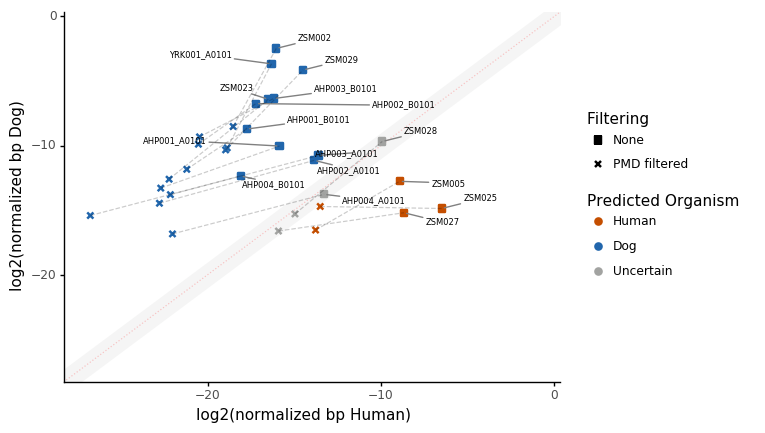

<ggplot: (8766698605979)>

In [182]:
# p = ggplot(data=d3, mapping= aes(x='log_aligned_human', y='log_aligned_dog', label='grepel_name')) + geom_abline(intercept=0, slope=1, color='red', alpha=0.2, linetype='dotted') 
p = ggplot(data=d3, mapping= aes(x='log_aligned_human', y='log_aligned_dog')) 
p = p + geom_polygon(data = uncertain_zone, mapping = aes(x='x',y='y'), fill = '#a2a3a1', alpha=0.1)
p = p + geom_abline(intercept=0, slope=1, color='red', alpha=0.2, linetype='dotted') 
p = p + geom_point(aes(color='prediction', shape='al_type'), stroke=1)
p = p + geom_line(aes(group='sample'), alpha=0.2, linetype='dashed')
p = p + theme_classic()
p = p + geom_text(data = d3, mapping= aes(x='log_aligned_human', y='log_aligned_dog', label = 'grepel_name'), size=6, adjust_text= {
    'expand_points': (2, 2),
    'expand_objects': (1.5, 2),
    'arrowprops': {
        'arrowstyle': '-',
        'color': 'grey'
    },
    'on_basemap':True
})

# p = p + geom_text(size=6, nudge_y=0.16, ha='right')
p = p + scale_shape_manual(name='Filtering', values={'None':'s', 'PMD filtered':'x'})
p = p + scale_color_manual(name='Predicted Organism', values = {'Human':'#c44e00', 'Dog':'#2166ac', 'Uncertain':'#a2a3a1'})
p = p + labs(x='log2(normalized bp Human)', y = 'log2(normalized bp Dog)')
p = p + coord_cartesian(xlim=[-27,-1],ylim=[-27,-1])
p.save("./results/figure4A.png", dpi=300)
p

/projects1/users/borry/15_miniconda3/envs/coproid_article/lib/python3.6/site-packages/plotnine/ggplot.py:706: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
/projects1/users/borry/15_miniconda3/envs/coproid_article/lib/python3.6/site-packages/plotnine/ggplot.py:707: PlotnineWarning: Filename: ./results/figure4A_supplementary.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


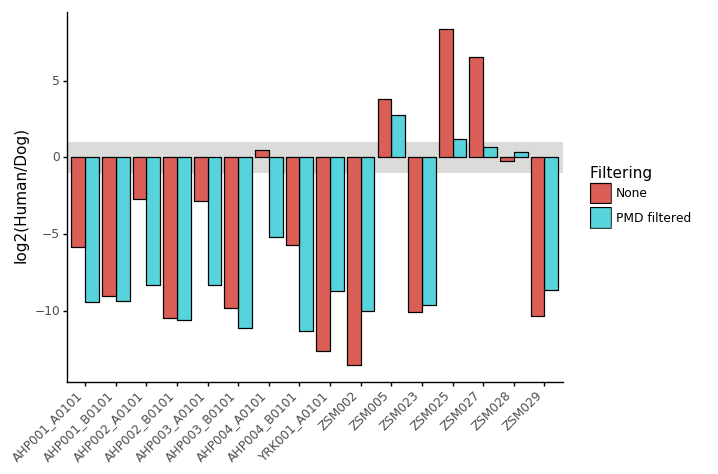

<ggplot: (8766697393598)>

In [183]:
p = ggplot(d3, aes(x='sample', y='log_ratio'))
p = p + geom_rect(ymin=-1,ymax=1, fill='#a2a3a1', xmin=0,xmax=30, alpha=0.01)
p = p + geom_bar(aes(fill='al_type'), stat='identity', position = 'dodge', color = 'black')
p = p + theme_classic() + theme(axis_text_x=element_text(angle=45, hjust=1)) + scale_fill_discrete(name='Filtering')
p = p + labs(x='',y='log2(Human/Dog)')
p.save("./results/figure4A_supplementary.png", dpi=300)
p

## Fig 4b: t-SNE embedding with archaelogical samples

In [123]:
s = "../../data/sourcepredict/sourcepredict_embedding.csv"
s_pred = "../../data/sourcepredict/prediction_sourcepredict.csv"

In [124]:
sp = pd.read_csv(s, index_col=0)

In [125]:
spp = pd.read_csv(s_pred, index_col=0).T

In [126]:
conditions = [(spp['Canis_familiaris'] > 0.5) ,
              (spp['Homo_sapiens'] > 0.5),
              (spp['Soil'] > 0.5),
              (spp['unknown'] > 0.5)
             ]
choices = ['Canis familiaris', 'Homo sapiens', 'Soil', 'Unknown']
spp['Predicted organism'] = np.select(conditions, choices, default='Unknown')

In [128]:
sp['organism'] = sp.drop(spp.index, axis=0)['labels'].append(spp['Predicted organism'])

In [129]:
sp['ml'] = np.where(sp['labels'] == 'sink', 'predicted', 'reference')

In [130]:
sp['organism'].value_counts()

Homo_sapiens        262
Canis_familiaris    150
Soil                 33
Homo sapiens          7
Unknown               3
Canis familiaris      1
Name: organism, dtype: int64

In [131]:
sp['organism'] = sp['organism'].str.replace('_'," ")

In [160]:
sp

,PC1,PC2,labels,name,organism,ml
SRR1175007,-6.298264,-27.017393,Homo_sapiens,SRR1175007,Homo sapiens,reference
SRR042182,-4.016565,-20.801596,Homo_sapiens,SRR042182,Homo sapiens,reference
SRR061154,-4.238123,-28.793858,Homo_sapiens,SRR061154,Homo sapiens,reference
SRR061499,-5.757694,-23.875792,Homo_sapiens,SRR061499,Homo sapiens,reference
SRR063469,-2.695920,-21.768589,Homo_sapiens,SRR063469,Homo sapiens,reference
SRR062324,-5.244892,-23.929192,Homo_sapiens,SRR062324,Homo sapiens,reference
SRR1179037,-5.917620,-26.994822,Homo_sapiens,SRR1179037,Homo sapiens,reference
SRR061236,-5.103558,-27.864850,Homo_sapiens,SRR061236,Homo sapiens,reference
SRR061456,-4.755292,-26.763216,Homo_sapiens,SRR061456,Homo sapiens,reference
SRR642021,-9.086836,-25.894678,Homo_sapiens,SRR642021,Homo sapiens,reference


In [163]:
sp_ref = sp.query('ml == "reference"')
sp_pred = sp.query('ml == "predicted"')

In [164]:
sample_type = pd.Series({
    'AHP003_A0101_SG1_1_S0':'Coprolite',
    'CMN001_D0101_SG1_1_S0':'Archaelogical sediment',
    'ZSM005':'Coprolite',
    'ZSM002':'Coprolite',
    'AHP003_B0101_SG1_1_S0':'Coprolite',
    'ZSM029':'Coprolite',
    'YRK001_A0101_SG1_1_S0':'Coprolite',
    'ZSM025':'Coprolite',
    'TRO001_A0101_SG1_1_S0':'Archaelogical sediment',
    'ZSM028':'Coprolite',
    'ZSM023':'Coprolite',
    'ECO004_D0101_SG1_1_S0':'Archaelogical sediment',
    'AHP001_A0101_SG1_1_S0':'Coprolite',
    'AHP002_A0101_SG1_1_S0':'Coprolite',
    'CBA001_A0101_SG1_1_S0':'Archaelogical sediment',
    'LEI010_A0101_SG1_1_S0':'Archaelogical sediment',
    'AHP004_A0101_SG1_1_S0':'Coprolite',
    'AHP004_B0101_SG1_1_S0':'Coprolite',
    'DRL001_A0101_SG1_1_S0':'Archaelogical sediment',
    'AHP001_B0101_SG1_1_S0':'Coprolite',
    'ZSM027':'Coprolite',
    'BRF001_A0101_SG1_1_S0':'Archaelogical sediment',
    'MLP001_A0101_SG1_1_S0':'Archaelogical sediment',
    'AHP002_B0101_SG1_1_S0':'Coprolite'
}, name='sample type')

In [165]:
sp_pred = sp_pred.merge(sample_type, left_index=True, right_index=True)

In [187]:
np.arange(1, sp_pred.shape[0])

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23])

In [188]:
sp_pred['samp_number'] = np.arange(1, sp_pred.shape[0]+1)

/projects1/users/borry/15_miniconda3/envs/coproid_article/lib/python3.6/site-packages/plotnine/ggplot.py:706: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
/projects1/users/borry/15_miniconda3/envs/coproid_article/lib/python3.6/site-packages/plotnine/ggplot.py:707: PlotnineWarning: Filename: results/figure4B.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


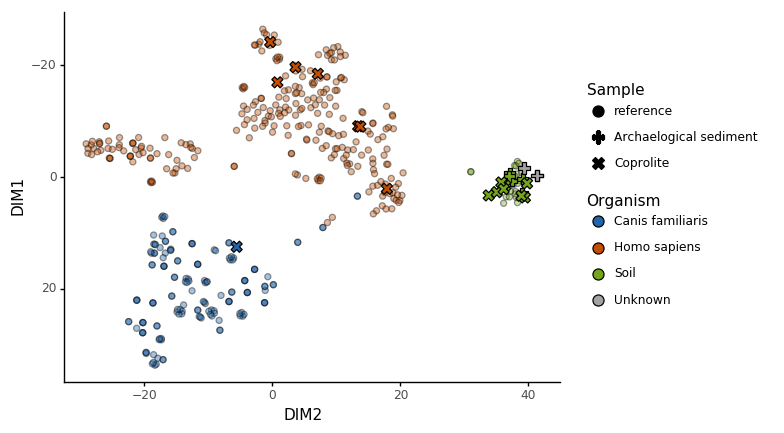

<ggplot: (-9223363270156020711)>

In [212]:
p = ggplot(sp_ref, aes(x='PC1',y='PC2')) + geom_point(aes(fill='organism', shape='ml'), stroke=0.5, color='black', size = 2, alpha=0.4)
p = p + geom_point(data = sp_pred, mapping=aes(x='PC1',y='PC2', fill='organism', shape='sample type'), stroke=0.5, color='black', size = 4)
p = p + scale_shape_manual(name='Sample', values={'Coprolite':'X', 'Archaelogical sediment':'P', 'reference':'o'}) + theme_classic() + labs(x='DIM1',y='DIM2')
p = p + scale_fill_manual(name = 'Organism', values = {"Canis familiaris":"#2166ac","Homo sapiens":"#c44e00", "Soil":"#75a51c", 'Unknown':'#a2a3a1'})
p = p  + scale_x_reverse() + coord_flip()
p.save("results/figure4B.png", dpi=300)
p

/projects1/users/borry/15_miniconda3/envs/coproid_article/lib/python3.6/site-packages/plotnine/ggplot.py:706: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
/projects1/users/borry/15_miniconda3/envs/coproid_article/lib/python3.6/site-packages/plotnine/ggplot.py:707: PlotnineWarning: Filename: results/figure4B_version_number.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


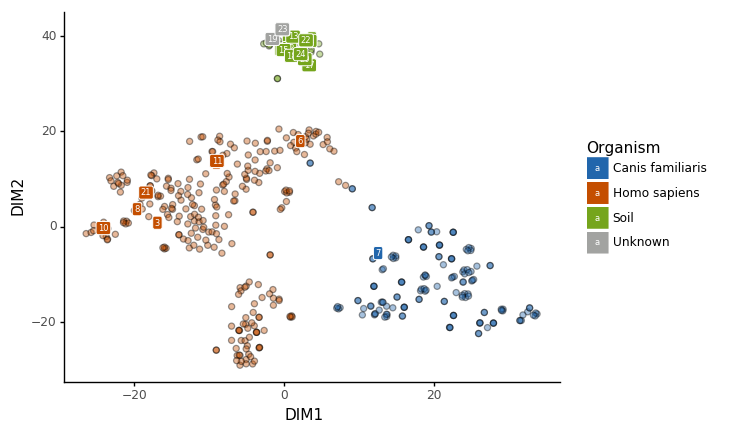

<ggplot: (8766698940813)>

In [195]:
p = ggplot(sp_ref, aes(x='PC1',y='PC2')) + geom_point(aes(fill='organism'), stroke=0.5, color='black', size = 2, alpha=0.4)
p = p + geom_label(data = sp_pred, mapping=aes(x='PC1',y='PC2', fill='organism', label='samp_number'), size = 6, color='white')
# p = p + scale_shape_manual(name='Samples', values={'Coprolite':'X', 'Archaelogical sediment':'P', 'reference':'o'})
p = p + theme_classic() + labs(x='DIM1',y='DIM2')
p = p + scale_fill_manual(name = 'Organism', values = {"Canis familiaris":"#2166ac","Homo sapiens":"#c44e00", "Soil":"#75a51c", 'Unknown':'#a2a3a1'})
p.save("results/figure4B_version_number.png", dpi=300)
p